In [1]:
# import necessary libraies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score,accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

Dataset link:https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [2]:
# read the dataset 
df_train=pd.read_csv(r'C:\Users\prajw\OneDrive\Desktop\train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# EDA

In [3]:
# check for the null values 
df_train.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [4]:
# check for any duplicates 
print("df_train has any duplicates",df_train.duplicated(keep='first').any())


df_train has any duplicates False


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# checking for the no of labels and count of its rows 
df_train['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In price_range label 0 has lowest price and 3 is the hihest price

# Visualization

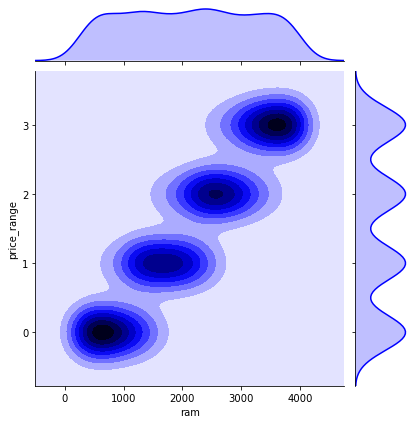

In [7]:
sns.jointplot(x='ram',y='price_range',data=df_train,color='blue',kind='kde')

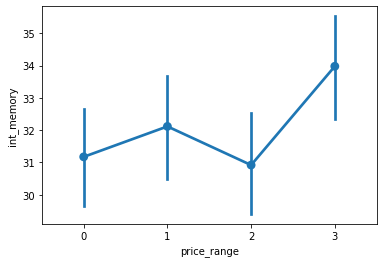

In [8]:
sns.pointplot(y='int_memory',x='price_range',data=df_train)

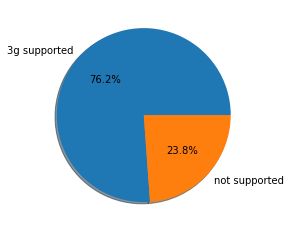

In [9]:
# % of Phones which support 3G
labels=['3g supported','not supported']
values=df_train['three_g'].value_counts().values
fig1,ax1=plt.subplots()
ax1.pie(values,labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

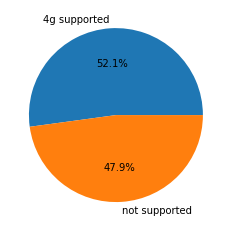

In [10]:
# % of Phones which support 4G
labels=['4g supported','not supported']
values=df_train['four_g'].value_counts().values
fig1,ax1=plt.subplots()
ax1.pie(values,labels=labels,autopct='%1.1f%%')
plt.show()

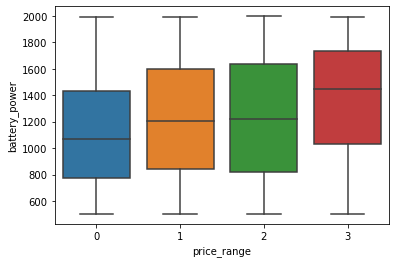

In [11]:
sns.boxplot(x="price_range", y="battery_power", data=df_train)

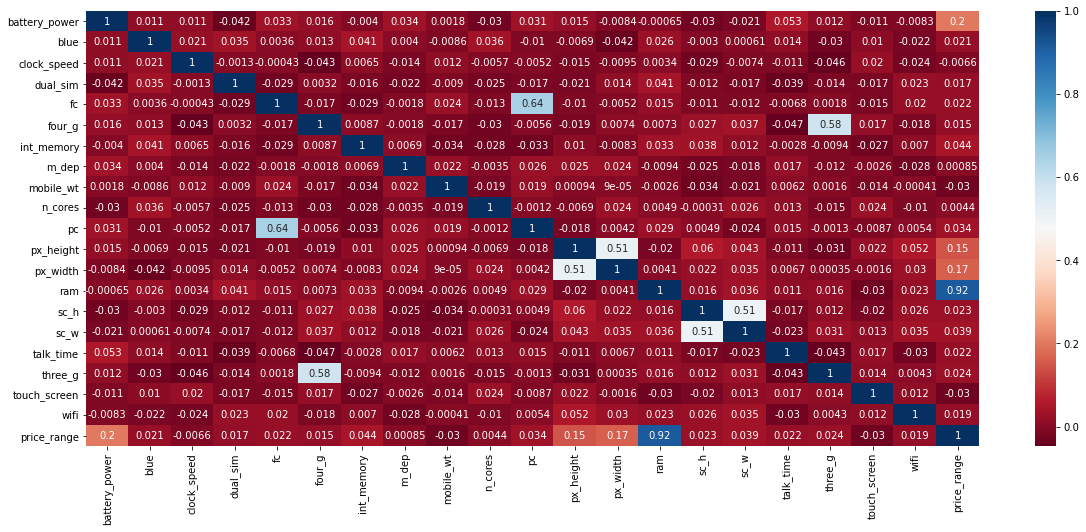

In [12]:
# feature selection using pearson correlation
plt.figure(figsize=(20,8))
cor=df_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.RdBu)
plt.show()

In [13]:
# find the features which has higher correlation
cor_target=abs(cor['price_range'])
rev_features=cor_target[cor_target>0.05]
rev_features

battery_power    0.200723
px_height        0.148858
px_width         0.165818
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

In [14]:
# drop columns which are not necessary for our model 
best_features=['battery_power','px_height','px_width','ram','price_range']
df_train=df_train[best_features]
df_train

,battery_power,px_height,px_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1
...,...,...,...,...,...
1995,794,1222,1890,668,0
1996,1965,915,1965,2032,2
1997,1911,868,1632,3057,3
1998,1512,336,670,869,0


In [15]:
x=df_train.drop(['price_range'],axis=1)
y=df_train['price_range']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [16]:
print("X_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",x_test.shape)
print("y_test shape",y_test.shape)

X_train shape (1400, 4)
y_train shape (1400,)
X_test shape (600, 4)
y_test shape (600,)


Linear Regression
KNN
Logistic Regression
Decision tree
Random forest

In [17]:
# linear regression
lin=LinearRegression()
lin.fit(x_train,y_train)
y_predict=lin.predict(x_test)
print("The accuracy of Linear Regression Model is {:.0%}".format(r2_score(y_test,y_predict)))

The accuracy of Linear Regression Model is 92%


In [18]:
# decision tree regession
dtr=DecisionTreeRegressor(random_state=5)
dtr.fit(x_train,y_train)
y_predict=dtr.predict(x_test)
print("The accuracy of Decision Tree Regression Model is {:.0%}".format(r2_score(y_test,y_predict)))

The accuracy of Decision Tree Regression Model is 88%


In [19]:
# logistic regression
logr=LogisticRegression()
logr.fit(x_train,y_train)
y_predict=logr.predict(x_test)
print("The accuracy of Logistic Regression Model is {:.0%}".format(accuracy_score(y_test,y_predict)))

The accuracy of Logistic Regression Model is 95%


In [20]:
print(confusion_matrix(y_test,y_predict))

[[159   4   0   0]
 [  4 144   2   0]
 [  0   6 126   7]
 [  0   0   5 143]]


In [21]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       163
           1       0.94      0.96      0.95       150
           2       0.95      0.91      0.93       139
           3       0.95      0.97      0.96       148

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



In [22]:
# decision Tree classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_predict=dtc.predict(x_test)
print("The accuracy of Decision Tree Classification Model is {:.0%}".format(accuracy_score(y_test,y_predict)))

The accuracy of Decision Tree Classification Model is 87%


In [23]:
#random forest classifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
print("The accuracy of Decision Tree Classification Model is {:.0%}".format(accuracy_score(y_test,y_predict)))

The accuracy of Decision Tree Classification Model is 92%


In [24]:
#naive bayes
nb=GaussianNB()
nb.fit(x_train,y_train) 
nb.fit(x_train,y_train)
y_predict=nb.predict(x_test)
print("The accuracy of Decision Tree Classification Model is {:.0%}".format(accuracy_score(y_test,y_predict)))

The accuracy of Decision Tree Classification Model is 80%
